In [3]:
# Prepare the GraphQL client
import requests
from IPython.display import display, Markdown
from gql import gql, Client
from gql.transport.requests import RequestsHTTPTransport

_transport = RequestsHTTPTransport(
    url='https://www.orkg.org/orkg/graphql-federated',
    use_json=True,
)

client = Client(
    transport=_transport,
    fetch_schema_from_transport=True,
)

## Define and run GraphQL query
Define the GraphQL query to find all publications including co-authors for [Shi Zhao](https://orcid.org/0000-0001-8722-6149):

In [4]:
# Generate the GraphQL query: find all publications, including co-authors or researcher id: "https://orcid.org/0000-0001-8722-6149"

query = gql("""{
  person(id: "https://orcid.org/0000-0001-8722-6149") {
    id
    name
    works {
      nodes {
        id
      }
    }
  }
}
""")

import json
data = client.execute(query)

## Display total number of publications by the researcher
Display the total number of the researcher's outputs to date.

In [5]:
e = data['person']['works']['nodes']
for i in e:
    print(i['id'])

https://doi.org/10.1098/rsif.2018.0515
https://doi.org/10.1080/23744235.2020.1717598
https://doi.org/10.1017/s0950268819002267
https://doi.org/10.1016/j.chemosphere.2020.125913
https://doi.org/10.1016/j.ijid.2020.01.050
https://doi.org/10.1101/2020.01.23.916395
https://doi.org/10.1101/602706
https://doi.org/10.1016/j.ijid.2019.02.030
https://doi.org/10.1016/j.ijid.2020.02.058
https://doi.org/10.1101/2020.02.21.20026559
https://doi.org/10.1093/jtm/taaa133
https://doi.org/10.1016/j.scitotenv.2020.141590
https://doi.org/10.1016/j.idm.2020.08.002
https://doi.org/10.1111/tbed.13647
https://doi.org/10.1093/jtm/taaa033
https://doi.org/10.2147/idr.s258035
https://doi.org/10.1101/2020.11.01.363739
https://doi.org/10.7717/peerj.10350
https://doi.org/10.2196/preprints.19994
https://doi.org/10.2196/19994


## Co-authors network
Note: These results were generated on local system. The results might vary on the actual ORKG content.

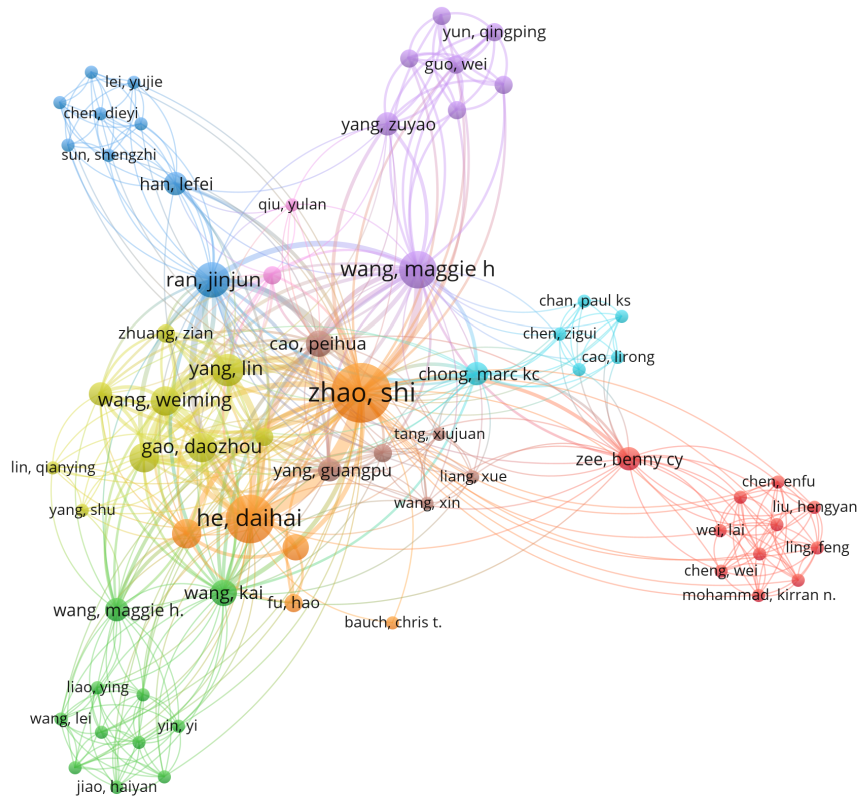

In [10]:
from IPython.display import display, Image
display(Image(filename='1.png', width = 200, height = 100))

In [11]:
#extract a co-author network of a researcher from the above network who have published COVID-19 papers and reported average CI<2. 

query = gql("""{
  person(id: "https://orcid.org/0000-0001-8722-6149") {
    id
    name
    works {
      nodes {
        id
        Paper(field: ["covid-19", "coronavirus"]) {
          label
          details(value: "Confidence interval") {
            label
            details {
              label
            }
            average
          }
        }
      }
    }
  }
}
""")

data = client.execute(query)

In [12]:
e = data['person']['works']['nodes']
for i in e:
    if i['Paper'] is not None:
        r=i['Paper']['details']
        for k in r:
            if k['average']<2:
                print(i['id'])

## Network of co-authors who have published COVID-19 papers and reported average CI<2

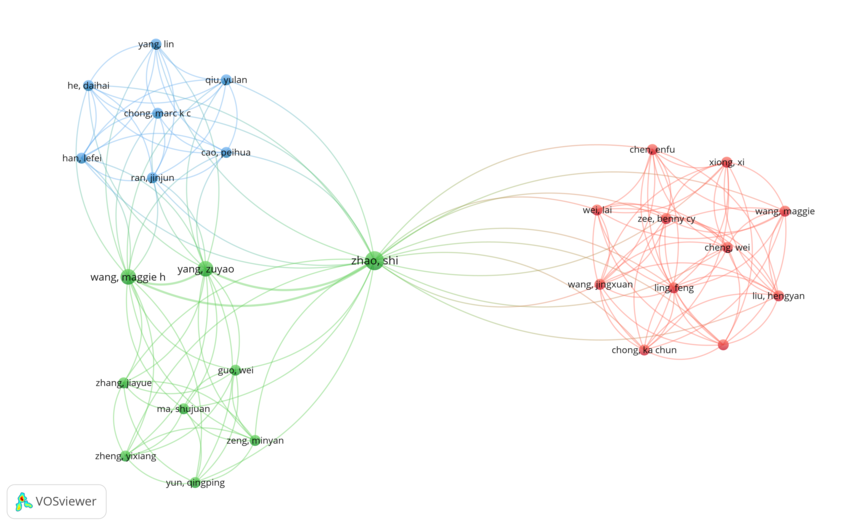

In [9]:
display(Image(filename='2.png'))

## Plot the researcher's publications co-authors


## Create a file containing publication DOIs
This file can be loaded into [VOSviewer](https://www.vosviewer.com/) tool in order to construct and visualise the researcher's co-authorship network.